In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#directory = "/home/jtso3/ghassan/ProMDLM/generated_sequences"
#
#names = ["generated_sequences_fulldiff", "generated_sequences_increment", "generated_sequences_fulldiff", "generated_sequences_two_stage", "generated_sequences_progen", "lysozyme_100_test_set_final"]
#
#for name in names:
#    blastn_file = f"{directory}/{name}_results_blastn.csv"
#    entropy_file = f"{directory}/{name}_results_entropy.csv"
#    ppl_file = f"{directory}/{name}_w_pseudo_perplexity.csv"
#    full_file = f"{directory}/{name}_results_full.csv"
#
#    # Read the files as dataframes
#    blastn_df = pd.read_csv(blastn_file)
#    entropy_df = pd.read_csv(entropy_file)["entropy"]
#    ppl_df = pd.read_csv(ppl_file)["pseudo_perplexity"]
#
#    # Combine their columns
#    combined_df = blastn_df.join(entropy_df, how="left")
#    combined_df = combined_df.join(ppl_df, how="left")
#    # Write the combined dataframe to full_file
#    combined_df.to_csv(full_file, index=False)

In [4]:
def boxplot_of_column(full_files, column_name, names, output_path):
    """
    Create a boxplot of the specified column from the full files.
    """
    data = []
    nb_samples=[]
    for path in full_files:
        df = pd.read_csv(path)
        nb_samples.append(len(df))
        data.append(df[column_name])

    names = [f"{name} (n={nb})" for name, nb in zip(names, nb_samples)]

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=names)
    plt.title(f'Boxplot of {column_name}')
    plt.ylabel(column_name)
    plt.savefig(output_path)


/tmp/ipykernel_1653601/1604508140.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1653601/1604508140.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1653601/1604508140.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)


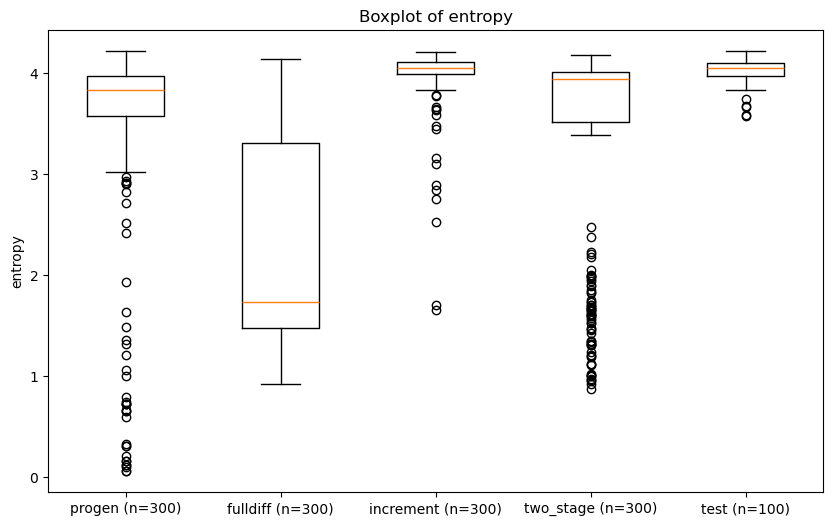

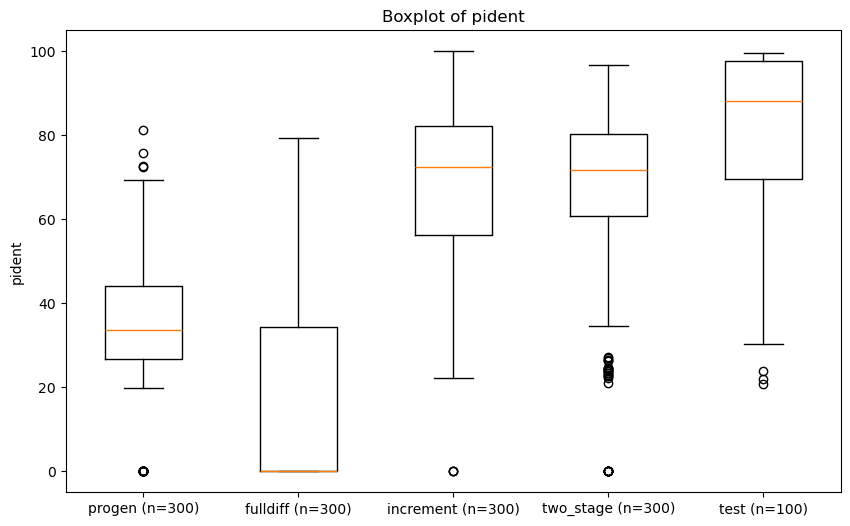

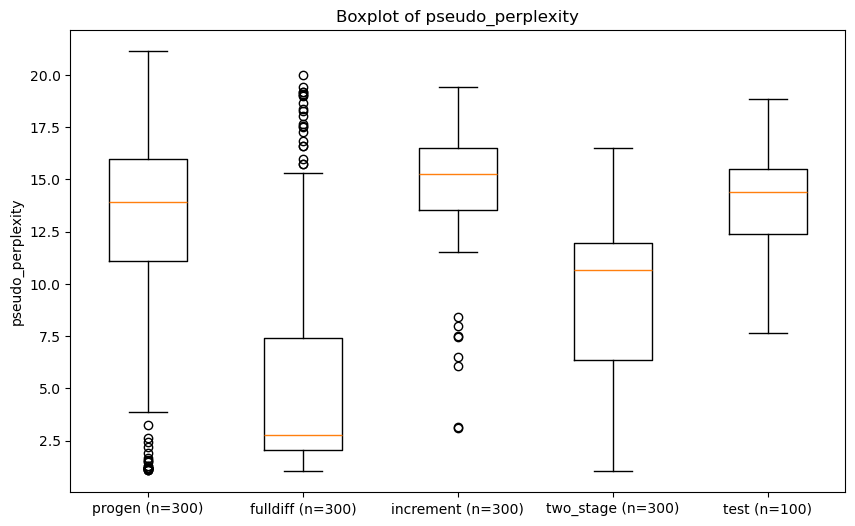

In [5]:
full_files = [
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_progen_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_fulldiff_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_increment_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_two_stage_results_full.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/lysozyme_100_test_set_final_results_full.csv"]

names = ["progen","fulldiff", "increment", "two_stage", "test"]


boxplot_of_column(full_files, "entropy", names, "plots_all_temp/entropy_boxplot.png")
boxplot_of_column(full_files, "pident", names, "plots_all_temp/diversity_boxplot_before_filtering.png")
boxplot_of_column(full_files, "pseudo_perplexity", names, "plots_all_temp/perplexity_boxplot_before_filtering.png")


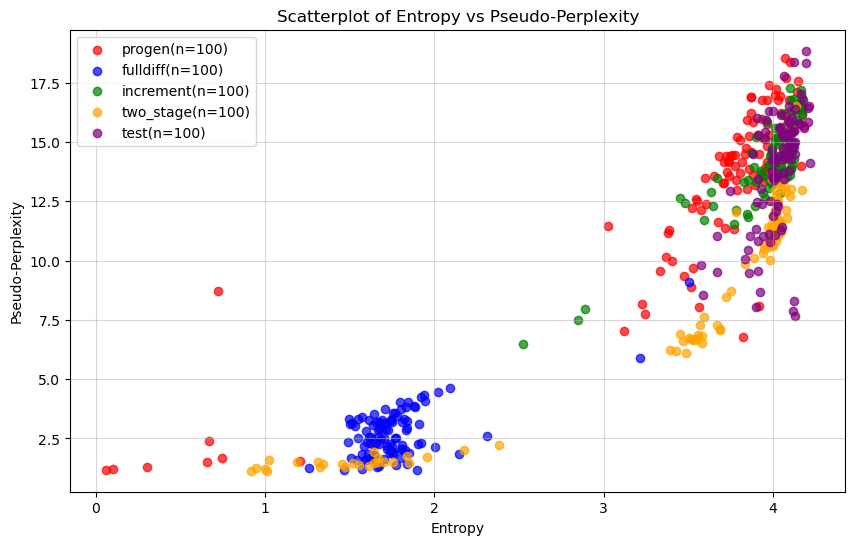

In [7]:
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each dataset

plt.figure(figsize=(10, 6))
for i, path in enumerate(full_files):
    df = pd.read_csv(path)
    df = df[(df["temperature"] == 1) | (df["temperature"].isna())]  # Filter rows where pident is 1
    plt.scatter(df['entropy'], df['pseudo_perplexity'], color=colors[i], label=names[i]+f"(n={len(df)})", alpha=0.7)

plt.title('Scatterplot of Entropy vs Pseudo-Perplexity')
plt.xlabel('Entropy')
plt.ylabel('Pseudo-Perplexity')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("imgs_t1/scatterplot_entropy_vs_pseudo_perplexity_before_filtering.png")

In [11]:

percent_passed = []

filtered_t1_files = ["/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_progen_results_full_t1_filtered.csv",
                     "/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_fulldiff_results_full_t1_filtered.csv",
                     "/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_increment_results_full_t1_filtered.csv",
                     "/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_two_stage_results_full_t1_filtered.csv",
                     "/home/jtso3/ghassan/ProMDLM/generated_sequences/lysozyme_100_test_set_final_results_full_t1_filtered.csv"]




for filtered_path, full_path in zip(filtered_t1_files, full_files):
    filtered_df = pd.read_csv(filtered_path)
    full_df = pd.read_csv(full_path)
    full_df = full_df[(full_df["temperature"] == 1) | (full_df["temperature"].isna())]
    percent_passed.append(len(filtered_df) / len(full_df) * 100)


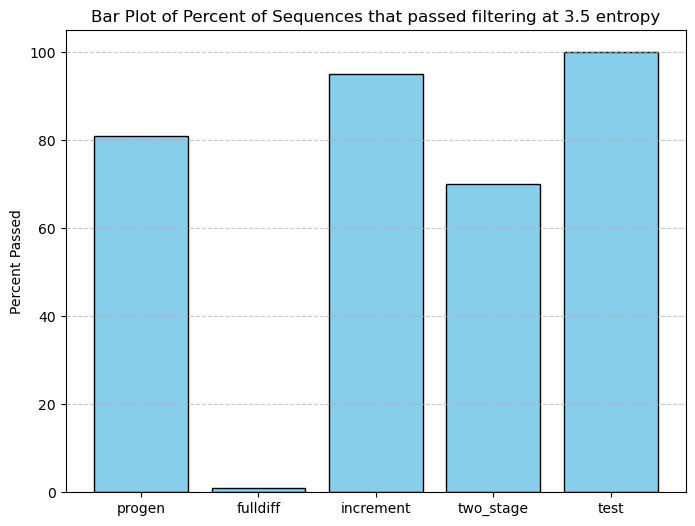

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(names, percent_passed, color='skyblue', edgecolor='black')
plt.title('Bar Plot of Percent of Sequences that passed filtering at 3.5 entropy')
plt.ylabel('Percent Passed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imgs_t1/percent_passed.png")

/tmp/ipykernel_1653601/1604508140.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)
/tmp/ipykernel_1653601/1604508140.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)


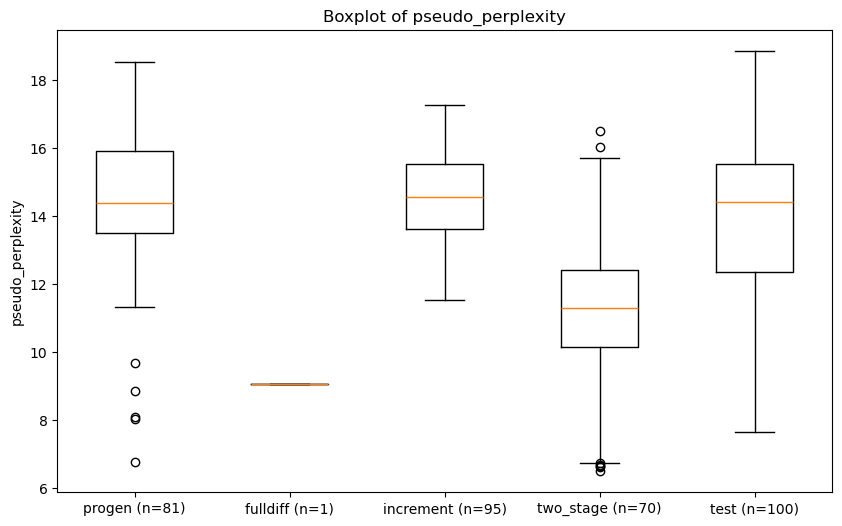

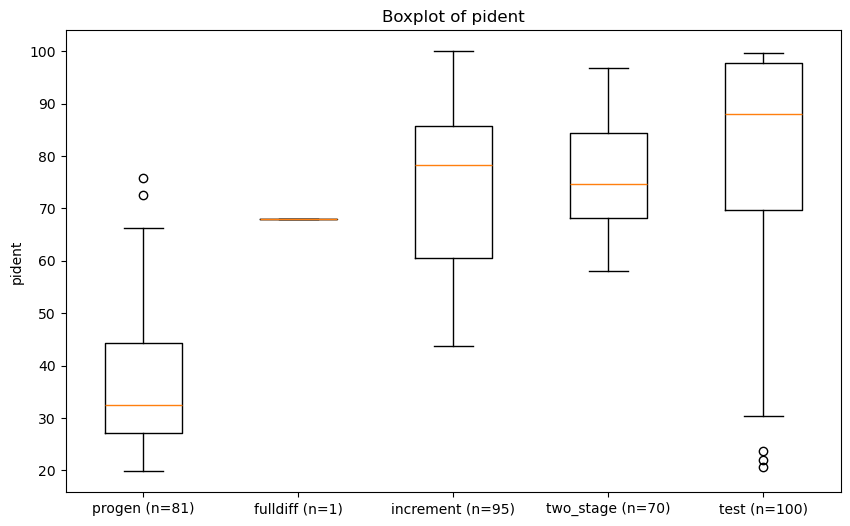

In [13]:
boxplot_of_column(filtered_t1_files, "pseudo_perplexity", names, "imgs_t1/perplexity_boxplot_after_filtering.png")
boxplot_of_column(filtered_t1_files, "pident", names, "imgs_t1/diversity_boxplot_after_filtering.png")

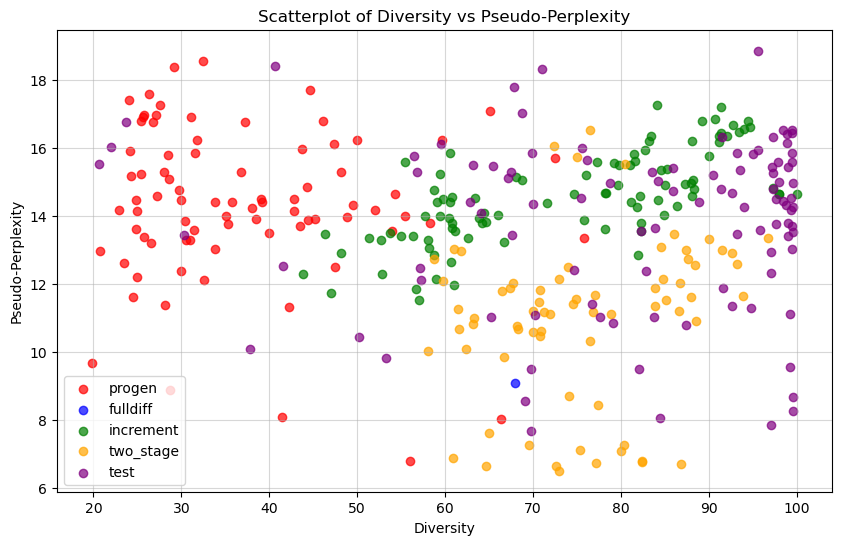

In [14]:
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each dataset

plt.figure(figsize=(10, 6))
for i, path in enumerate(filtered_t1_files):
    df = pd.read_csv(path)
    plt.scatter(df['pident'], df['pseudo_perplexity'], color=colors[i], label=names[i], alpha=0.7)

plt.title('Scatterplot of Diversity vs Pseudo-Perplexity')
plt.xlabel('Diversity')
plt.ylabel('Pseudo-Perplexity')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("imgs_t1/scatterplot_diversity_vs_pseudo_perplexity_after_filtering.png")

/tmp/ipykernel_1420723/310219608.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=names)


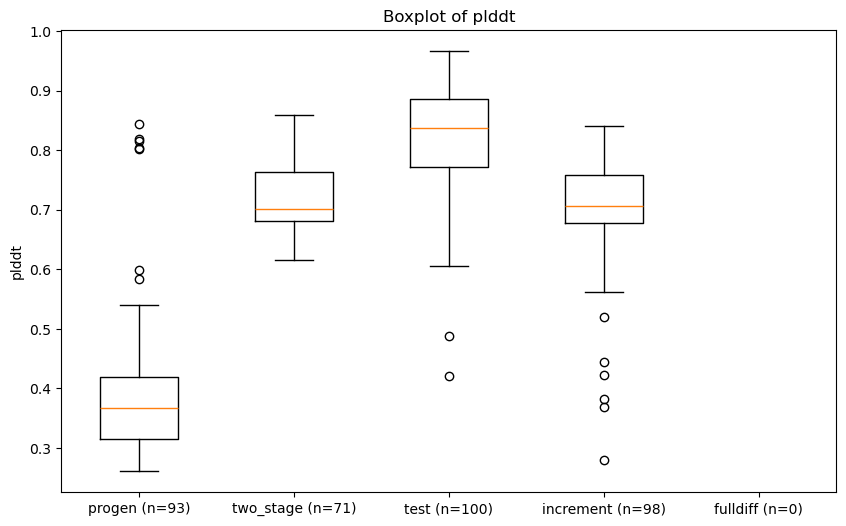

In [120]:
folded_files  = ["/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_progen_results_full_filtered_results_esmfold.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_two_stage_results_full_filtered_results_esmfold.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/lysozyme_100_test_set_final_results_full_filtered_results_esmfold.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_increment_results_full_filtered_results_esmfold.csv",
"/home/jtso3/ghassan/ProMDLM/generated_sequences/generated_sequences_fulldiff_results_full_filtered_results_esmfold.csv"]


names_folded = ["progen","two_stage", "test", "increment", "fulldiff"]

boxplot_of_column(folded_files, "plddt", names_folded, "imgs_t_1_5/plddt_boxplot_after_filtering.png", temp=1.5)

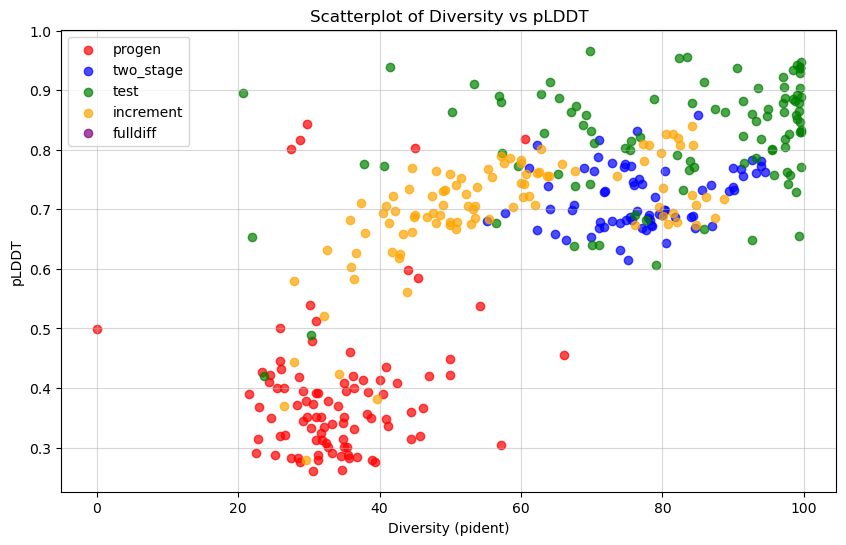

In [118]:
plt.figure(figsize=(10, 6))
for i, path in enumerate(folded_files):
    df = pd.read_csv(path)
    df = df[(df["temperature"] == 1.5) | (df["temperature"].isna())]  # Filter rows where temperature is 1
    plt.scatter(df['pident'], df['plddt'], color=colors[i], label=names_folded[i], alpha=0.7)

plt.title('Scatterplot of Diversity vs pLDDT')
plt.xlabel('Diversity (pident)')
plt.ylabel('pLDDT')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("imgs_t_1_5/scatterplot_diversity_vs_plddt.png")